### What are the most demanded skills for the top 3 most popular data roles?


#### Methodology


1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [2]:
# import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\Job_Market_Analysis_DataProfile_2023-24_python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter Data for the United States

Filter the data for the market of the United States.

In [3]:
df_us = df[df['job_country'] == 'United States']  #------------------------------> Filtering rows based on job_country column

## Explode Skills
Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [4]:
df_skills = df_us.explode('job_skills')

df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


Grouping data based on job_title_short & job_skills

In [5]:
df_skill_count = df_skills.groupby(['job_title_short','job_skills']).size().to_frame()

df_skill_count = df_skill_count.reset_index()

df_skill_count = df_skill_count.rename(columns={0: 'skill_count'})

df_skill_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,38
1,Business Analyst,airtable,3
2,Business Analyst,alteryx,264
3,Business Analyst,angular,10
4,Business Analyst,ansible,3
...,...,...,...
1865,Software Engineer,wire,2
1866,Software Engineer,word,106
1867,Software Engineer,workfront,2
1868,Software Engineer,yarn,6


Filtering rows having skills only for the top 3 job roles

In [6]:
top_3_jobs = df_skill_count['job_title_short'].value_counts().head(3).index #-----------> selecting top 3 job titles 
df_top3_job = df_skill_count[df_skill_count['job_title_short'].isin(top_3_jobs)]
df_top3_job


,job_title_short,job_skills,skill_count
297,Data Analyst,airflow,387
298,Data Analyst,airtable,36
299,Data Analyst,alteryx,2045
300,Data Analyst,angular,129
301,Data Analyst,ansible,48
...,...,...,...
959,Data Scientist,workfront,2
960,Data Scientist,wrike,1
961,Data Scientist,xamarin,3
962,Data Scientist,yarn,119


Filtering rows to keep only top 6 skills in each of the 3 top jobs roles

In [7]:
df_top6_skills = df_top3_job.sort_values(by=['job_title_short','skill_count'] ,ascending= False).groupby('job_title_short').head(6)
df_top6_skills

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
921,Data Scientist,sql,30034
890,Data Scientist,r,26022
902,Data Scientist,sas,14340
932,Data Scientist,tableau,13859
751,Data Scientist,aws,10288
694,Data Engineer,sql,23958
659,Data Engineer,python,22762
530,Data Engineer,aws,15018
531,Data Engineer,azure,11321


## Plot Skill Counts

Creates a stacked horizontal bar chart for the top 6 skills for Top 3 roles, displaying the frequency of each skill.

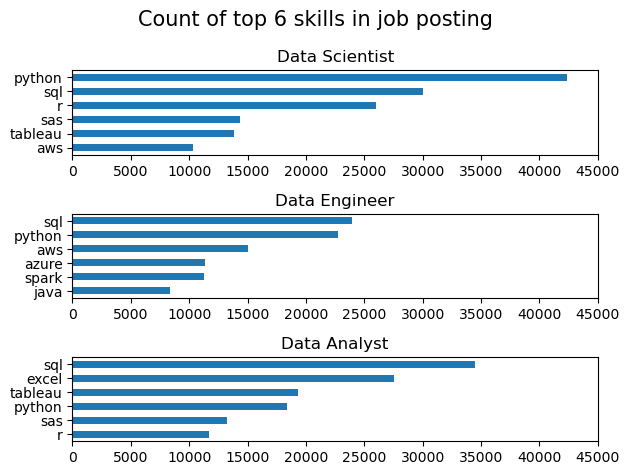

In [8]:
fig, ax = plt.subplots(len(top_3_jobs),1)

for i in range(len(top_3_jobs)):
    df_draw=df_top6_skills[df_top6_skills['job_title_short'] == top_3_jobs[i]]
    df_draw.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False, title= top_3_jobs[i])
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,45000)
    ax[i].set_ylabel('')

fig.suptitle('Count of top 6 skills in job posting', fontsize =15)
plt.tight_layout()
plt.show()



### Convert Counts to Percentages

Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

In [9]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name= 'job_posting_total')
df_job_title_count

,job_title_short,job_posting_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


### mergering df_top6_skill & df_job_title_count

Mergering both the data frames to create a new dataframe in which we add a new column called skill_percent which calculates out of total job posting in a job field e.g. Data Scientist how many jobs required a particular skill

In [10]:
df_skill_perc = pd.merge(df_top6_skills,df_job_title_count,how='left',on='job_title_short')
df_skill_perc['skill_percent'] = round((df_skill_perc['skill_count']/df_skill_perc['job_posting_total'])*100,ndigits=2)
df_skill_perc

,job_title_short,job_skills,skill_count,job_posting_total,skill_percent
0,Data Scientist,python,42379,58830,72.04
1,Data Scientist,sql,30034,58830,51.05
2,Data Scientist,r,26022,58830,44.23
3,Data Scientist,sas,14340,58830,24.38
4,Data Scientist,tableau,13859,58830,23.56
5,Data Scientist,aws,10288,58830,17.49
6,Data Engineer,sql,23958,35080,68.30
7,Data Engineer,python,22762,35080,64.89
8,Data Engineer,aws,15018,35080,42.81
9,Data Engineer,azure,11321,35080,32.27


## Plot Percentage Count

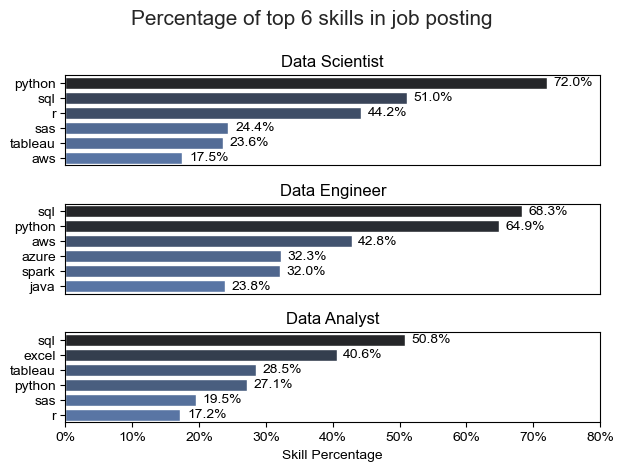

In [11]:
fig, ax = plt.subplots(len(top_3_jobs),1)

sns.set_theme(style='ticks')

for i in range(len(top_3_jobs)):
    df_draw=df_skill_perc[df_skill_perc['job_title_short'] == top_3_jobs[i]]
    sns.barplot(data=df_draw, x='skill_percent', y='job_skills' , ax=ax[i], hue='skill_percent', palette='dark:b_r', legend= False)
    ax[i].set_title(top_3_jobs[i])
    ax[i].set_xlim(0,80)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    if i < len(top_3_jobs) - 1:  # Hide x-axis for ax[0] and ax[1]
        ax[i].set_xlabel('')
        ax[i].xaxis.set_visible(False)
    else:  # Show x-axis for ax[2]
        ax[i].set_xlabel('Skill Percentage')
        ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

        
    for p in ax[i].patches:
        percentage = f'{p.get_width():.1f}%'
        ax[i].annotate(percentage, 
                       (p.get_width() + 1, p.get_y() + p.get_height() / 2),  # Position just outside the bar
                       ha='left', va='center', fontsize=10, color='black')

fig.suptitle('Percentage of top 6 skills in job posting', fontsize =15)
plt.tight_layout()
plt.show()

